In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def load_orbit(filename):
    data = []*0
    with open(filename, "r") as f:
        data = f.read()
    data = data.split("\n") # split text into lines
    data = data[8:-1]       # skip the header and trailing newline
    data = [line.split(" ") for line in data] # whitespace delimited data
    # remove whitespace-only elemnts
    data = [[point for point in line if point != ''] for line in data]
    az = [line[2] for line in data]    
    el = [line[3] for line in data]
    az = [float(point.replace(',', '.')) for point in az]
    el = [float(point.replace(',', '.')) for point in el]
    az = [point * np.pi / 180 for point in az] # to radians
    el = [90 - point for point in el]  # this should be done with axes, not data
    
    return (az, el)

def plot_orbit(az, el):
    
    ax = plt.figure().add_subplot(111, projection="polar")
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi/2)
    ax.plot(az,el)

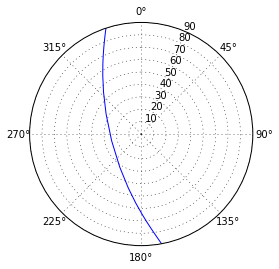

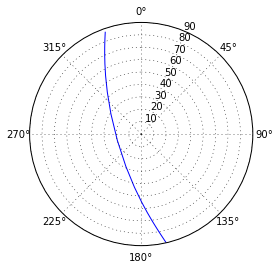

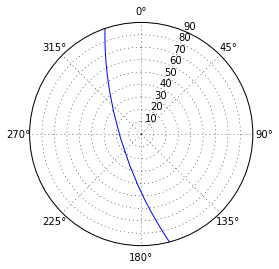

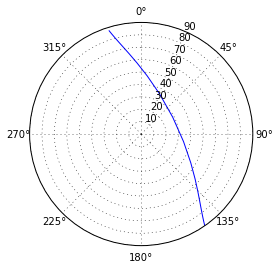

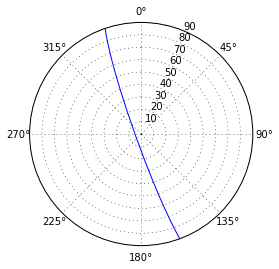

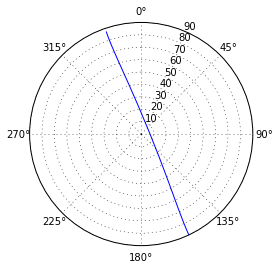

In [29]:
from glob import glob

for file in glob("NOAA*txt"): 
    az, el = load_orbit(file)
    plot_orbit(az,el)

In [5]:
!ls


NOAA-15-91282.txt  NOAA-18-54283.txt  NOAA-18-55723.txt  orbit-plot.ipynb
NOAA-15-92736.txt  NOAA-18-54297.txt  NOAA-19-36562.txt
